# <h1> Introduction: <h1>

<h3>Basketball has captivated sports enthusiasts for generations, and with it, the debate over who should be crowned as the greatest NBA player of all time continues to fuel passionate discussions. From legendary icons like Michael Jordan and Bill Russell to the modern-day phenoms such as Stephen Curry and Giannis Antetokounmpo, the NBA boasts a rich history of talent, athleticism, and unforgettable moments. </h3>
<br>
<h3>In this notebook, we embark on a data-driven journey to uncover the true legends of the game. Leveraging the power of Python and advanced statistical analysis, we delve into the accolades, achievements, and gameplay statistics of the NBA's top players. By exploring their impact on the court, recognition from prestigious awards like MVPs and All-NBA selections, and their contributions to championship-winning teams, we aim to unveil a definitive ranking of the top 75 NBA players of all time. </h3>
<br>
<h3>We'll start by gathering data from various sources, including basketball-reference and Wikipedia, to ensure a comprehensive dataset covering decades of NBA history. Then, employing libraries like pandas and numpy we'll clean, combine, and analyze the data, generating individual scores for each player that encompass their peak performance and overall career contributions. </h3>
<br>
<h3>So, let's lace up our virtual sneakers and embark on this captivating journey to crown the undisputed greatest NBA player of all time! </h3>

# Import necessary packages and libraries


In [ ]:
# @title

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
import numpy as np
import plotly.graph_objects as go


# Import data from 1952 to today (2023)


<h2> We dive into web scraping, retrieving advanced statistics for NBA and ABA players for each year. The process is carried out within a loop that iterates through the specified years. </h2>


---


<h2>  ( 1952 was selected as the first year due to it being the first year advanced stats were used ) </h2>

Keep in mind BPM is estimated for players before 1973-1974. The formula is (WS/48 * 40.7338) - 4.30771. This estimate has an R^2 of ~.7. It's not great but it's the best estimate we have, so values for older players may be incorrect

In [ ]:
# @title
years = list(range(1952,2024))
final_data = pd.DataFrame()

for year in years:

  print(f'Processing: {year}')
  url = f'https://www.basketball-reference.com/leagues/ABA_{year}_advanced.html'
  try:
    Adv_data_aba = pd.read_html(url)
    time.sleep(4)
    Adv_data_aba = Adv_data_aba[0]
    Adv_data_aba.drop(Adv_data_aba[Adv_data_aba['Rk']== "Rk"].index, inplace = True)
    Adv_data_aba['Player'] = Adv_data_aba['Player'].str.replace('*', '')
    if year < 1974:
      Adv_data_aba["BPM"] = (Adv_data_aba["WS/48"].astype(float) * 40.7338 )- 4.30771
  except:
    print("No ABA Data!")
    Adv_data_aba = None

  url2 = f'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html'
  time.sleep(4)
  Adv_data = pd.read_html(url2)
  Adv_data = Adv_data[0]

  Adv_data.drop(Adv_data[Adv_data['Rk']== "Rk"].index, inplace = True)
  Adv_data['Player'] = Adv_data['Player'].str.replace('*', '')
  if year < 1974:
    Adv_data["BPM"] = (Adv_data["WS/48"].astype(float) * 40.7338 )- 4.30771


  try:
    combined = Adv_data.set_index(["Player","Tm"]).combine_first(Adv_data_aba.set_index(["Player","Tm"]))
  except:
    combined = Adv_data.set_index(["Player","Tm"])


  combined["Year"] = f"{year-1}-{year}"

  final_data = pd.concat([final_data,combined],ignore_index=False)

  print(f"Finished with {year}")

final_data.to_csv("Player_Poss-Adv_data_52-23.csv")

# Collect Award Data

<h3> We collect data for each of the mojor awards in the NBA MVP,&nbsp DPOY,&nbsp All-Star, and All NBA teams. </h3>

<h2> MVP </h2>

In [ ]:
# @title
mvp_data_source = pd.read_html("https://en.wikipedia.org/wiki/NBA_Most_Valuable_Player_Award")
mvp_data = mvp_data_source[6]

char_remov = ['\d+',')','(','*','^',"§","†"]
for char in char_remov:
    mvp_data["Player"] = mvp_data["Player"].str.replace(char,'')
mvp_data["Player"] = mvp_data["Player"].str.strip()
mvp_data["Season"] = mvp_data["Season"].str.replace("†",'')

for i in ["Player"]:
  for j in range(len(mvp_data)):
    if mvp_data[i].iloc[j] == "Kareem Abdul-Jabbar[g]" or "Lew Alcindor[g]":
      mvp_data[i].iloc[j] = "Kareem Abdul-Jabbar"

mvp_data.to_csv("Mvp_Data.csv")

<h2> All NBA team data </h2>

In [ ]:
# @title
#All-Nba_Data
all_nba=pd.read_html("https://en.wikipedia.org/wiki/All-NBA_Team")
all_nba_data = pd.DataFrame()

for i in range(3):
  data = all_nba[i+5]
  d = pd.DataFrame()
  d["FirstTeam"] = data["First team"]["Players"]
  d["SecondTeam"] = data["Second team"]["Players"]
  if i==2:
    d["ThirdTeam"] = data["Third team"]["Players"]
  else:
    d["ThirdTeam"] = "N/A"

  d["FirstTeam"] = d["FirstTeam"].str.strip()
  d["SecondTeam"] = d["SecondTeam"].str.strip()
  d["ThirdTeam"] = d["ThirdTeam"].str.strip()

  char_remov = ['\d+',')','(','*','^',"§","†"]
  for char in char_remov:
      d["FirstTeam"] = d["FirstTeam"].str.replace(char,'')
      d["SecondTeam"] = d["SecondTeam"].str.replace(char,'')
      d["ThirdTeam"] = d["ThirdTeam"].str.replace(char,'')

  for i in ["FirstTeam","SecondTeam","ThirdTeam"]:
    for j in range(len(d)):
      if d[i].iloc[j] in ["Akeem Olajuwon[e] ","Akeem Olajuwon[e]"]:
        d[i].iloc[j] = "Hakeem Olajuwon"
      elif d[i].iloc[j] in ["Ron Artest[f] ","Ron Artest[f]"]:
        d[i].iloc[j] = "Ron Artest"
      elif d[i].iloc[j] in ["Amare Stoudemire[g] ","Amare Stoudemire[g]"]:
        d[i].iloc[j] = "Amar'e Stoudemire"

  d["Season"] = data["Season"]["Season"]
  all_nba_data = all_nba_data.append(d,ignore_index=False)

all_nba_data.to_csv("All_Nba_Teams.csv",)

<h2> All NBA Defensive team data </h2>

In [ ]:
# @title
#All Defensive Teams

#All-Nba_Data
all_nba_def=pd.read_html("https://en.wikipedia.org/wiki/NBA_All-Defensive_Team")

all_nba_def_data = pd.DataFrame()

all_nba_def = all_nba_def[5]

defense = pd.DataFrame()
defense["FirstTeam"] = all_nba_def["First team"]["Players"]
defense["SecondTeam"] = all_nba_def["Second team"]["Players"]

defense["FirstTeam"] = defense["FirstTeam"].str.strip()
defense["SecondTeam"] = defense["SecondTeam"].str.strip()

char_remov = ['\d+',')','(','*','^',"§","†"]
for char in char_remov:
    defense["FirstTeam"] = defense["FirstTeam"].str.replace(char,'')
    defense["SecondTeam"] = defense["SecondTeam"].str.replace(char,'')

for i in ["FirstTeam","SecondTeam"]:
  for j in range(len(defense)):
      defense[i].iloc[j] = defense[i].iloc[j].replace('[a]',"")
      defense[i].iloc[j] = defense[i].iloc[j].replace('[b]',"")
      defense[i].iloc[j] = defense[i].iloc[j].replace('[c]',"")
      defense[i].iloc[j] = defense[i].iloc[j].replace('[d]',"")
      defense[i].iloc[j] = defense[i].iloc[j].replace('[e]',"")
      defense[i].iloc[j] = defense[i].iloc[j].replace('[f]',"")
      defense[i].iloc[j] = defense[i].iloc[j].replace('[g]',"")
      defense[i].iloc[j] = defense[i].iloc[j].replace(' tie',"")
      defense[i].iloc[j] = defense[i].iloc[j].strip()

      if str(defense[i].iloc[j]) =="Akeem Olajuwon":

          defense[i].iloc[j] = "Hakeem Olajuwon"

defense["Season"] = all_nba_def["Season"]["Season"]

all_nba_def_data = all_nba_def_data.append(defense,ignore_index=False)

all_nba_def_data.to_csv("All_Nba_Def_Teams.csv")


<h2> All Star data </h2>

In [ ]:
# @title
# All-Star_data
all_star=pd.read_html("https://en.wikipedia.org/wiki/List_of_NBA_All-Stars")

all_star_data = all_star[1].iloc[:, : 3]

all_star_data.rename(columns = {'Selections[c]':'Selections'}, inplace = True)

for player in range(len(all_star_data)):
  player_select_list = []
  year_blocks = all_star_data["Selections"].loc[player].split(";")
  player_select_list = []
  for years in year_blocks:
    year_range = years.split("–")
    if len(year_range) > 1:
      player_select_list = player_select_list + list(range(int(year_range[0]),int(year_range[1])+1))
    else:
      player_select_list = player_select_list + year_range
  all_star_data["Selections"].loc[player] = player_select_list

  char_remov = ['\d+',')','(','*','^',"§","†"]
  for char in char_remov:
      all_star_data["Player"] = all_star_data["Player"].str.replace(char,'')

  for i in ["Player"]:
    for j in range(len(all_star_data)):
      if all_star_data[i].iloc[j] == "Hakeem Olajuwon[b]":
        all_star_data[i].iloc[j] = "Hakeem Olajuwon"
      elif all_star_data[i].iloc[j] == "Kareem Abdul-Jabbar[a]":
        all_star_data[i].iloc[j] = "Kareem Abdul-Jabbar"
      elif all_star_data[i].iloc[j] == "Metta World Peace[d]":
        all_star_data[i].iloc[j] = "Ron Artest"

all_star_data.to_csv("All_Star_Data.csv")

<h2> Defensive Player of the Year data </h2>

In [ ]:
# @title
#Dpoy

dpoy = pd.read_html("https://www.basketball-reference.com/awards/dpoy.html")

dpoy_data = dpoy[0].iloc[:,:3]

dpoy_data.columns = dpoy_data.columns.droplevel()

dpoy_data.to_csv("DPOY.csv")

# Combine all of the data up to this point

In [ ]:
# @title
# filtering the data

data = pd.read_csv("Player_Poss-Adv_data_52-23.csv")
dpoy_data = pd.read_csv("DPOY.csv")
all_star_data = pd.read_csv("All_Star_Data.csv")
mvp_data = pd.read_csv("Mvp_Data.csv")
all_data = pd.read_csv("All_Nba_Teams.csv")
all_def_data = pd.read_csv("All_Nba_Def_Teams.csv")

dpoy_list = list(dpoy_data["Player"])
as_list = list(all_star_data["Player"])
mvp_list = list(mvp_data["Player"])
all_first_list = list(all_data["FirstTeam"].str.strip())
all_second_list = list(all_data["SecondTeam"].str.strip())
all_third_list = list(all_data["ThirdTeam"].str.strip())
all_def_first_list = list(all_def_data["FirstTeam"].str.strip())
all_def_second_list = list(all_def_data["SecondTeam"].str.strip())



df_filtered = data

df_filtered["DPOY"] = 0
df_filtered["All_Star"] = 0
df_filtered["MVP"] = 0
df_filtered["All_NBA_1st"] = 0
df_filtered["All_NBA_2nd"] = 0
df_filtered["All_NBA_3rd"] = 0
df_filtered["All_NBA_DEF_1st"] = 0
df_filtered["All_NBA_DEF_2nd"] = 0

for row in range(len(df_filtered)):

  player = df_filtered["Player"].iloc[row].strip()
  season = df_filtered["Year"].iloc[row].strip()

  # DPOY
  if player in dpoy_list:
    dpoy_year_list = list(dpoy_data[(dpoy_data["Player"] == player)]["Season"])
    for year in dpoy_year_list:
      if season.split("-")[0].strip() == year.split("-")[0]:
        df_filtered["DPOY"].iloc[row] = 1

  #ALL_STAR
  if player in as_list:
    as_year_list = all_star_data[(all_star_data["Player"] == player)]["Selections"].tolist()
    as_year_list = as_year_list[0][1:][:-1].split(",")
    for year in as_year_list:
      year = year.replace("'","").strip()
      if season.split("-")[1] == year:
        df_filtered["All_Star"].iloc[row] = 1

  #MVP
  if player in mvp_list:
    mvp_year_list = list(mvp_data[(mvp_data["Player"] == player)]["Season"])
    for year in mvp_year_list:
      if season.split("-")[0].strip() == year.split("–")[0]:
        df_filtered["MVP"].iloc[row] = 1

  #ALL_NBA

  # 1st 2009–10

  if player in all_first_list:
    all_first_year_list = list(all_data[(all_data["FirstTeam"].str.strip() == player)]["Season"])
    for year in all_first_year_list:
      if season.split("-")[0].strip() == year.split("–")[0].strip():
        df_filtered["All_NBA_1st"].iloc[row] = 1

  #2nd

  if player in all_second_list:
    all_2nd_year_list = list(all_data[(all_data["SecondTeam"].str.strip() == player)]["Season"])
    for year in all_2nd_year_list:
      if season.split("-")[0].strip() == year.split("–")[0].strip():
        df_filtered["All_NBA_2nd"].iloc[row] = 1

  #3rd

  if player in all_third_list:
    all_3rd_year_list = list(all_data[(all_data["ThirdTeam"].str.strip() == player)]["Season"])
    for year in all_3rd_year_list:
      if season.split("-")[0].strip() == year.split("–")[0].strip():
        df_filtered["All_NBA_3rd"].iloc[row] = 1


  #ALL_NBA_DEF

  #1st


  if player in all_def_first_list:
      all_first_def_year_list = list(all_def_data[(all_def_data["FirstTeam"].str.strip() == player)]["Season"])
      for year in all_first_def_year_list:
        if season.split("-")[0].strip() == year.split("–")[0].strip():
          df_filtered["All_NBA_DEF_1st"].iloc[row] = 1

  #2nd
  if player in all_def_second_list:
      all_second_def_year_list = list(all_def_data[(all_def_data["SecondTeam"].str.strip() == player)]["Season"])
      for year in all_second_def_year_list:
        if season.split("-")[0].strip() == year.split("–")[0].strip():
          df_filtered["All_NBA_DEF_2nd"].iloc[row] = 1

df_filtered.to_csv("Complete.csv")

<h1> Only want data from members of the Top 75 team </h2>

In [ ]:
# @title
df_filtered = pd.read_csv("Complete.csv")
df_filtered["Final_Score"] = 0
top_75 = list(pd.read_csv("Top 75.csv")["Top 75 Players"])
df_filtered = df_filtered[df_filtered["Player"].isin(top_75)]
df_filtered.to_csv("Top_75_Stats.csv")

# Gather season by season playoff game data for each player on the Top 75 team

In [ ]:
# @title
import requests
from bs4 import BeautifulSoup

def scrape_player_names(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    player_names = soup.find_all("div", class_="players")
    names_list = [player.text.strip() for player in player_names]
    return names_list[0].split("\n")[0]

In [ ]:
# @title
from ast import Continue
playoff_data = pd.DataFrame()


for player in top_75:
  print(f"Processing: {player}")
  name = player.lower().replace("'","")
  first_last = name.split(" ")
  init = first_last[1][0]
  tag = first_last[1][0:5] + first_last[0][0:2]


  urls = [f"https://www.basketball-reference.com/players/{init}/{tag}01.html",f"https://www.basketball-reference.com/players/{init}/{tag}02.html"]

  for url in urls:
    player_name = scrape_player_names(url)
    if player_name == player:
      time.sleep(4)
      data = pd.read_html(url)[6]
      data = data[data["Season"].fillna("0").str.contains("-")]
      data["Player"] = player
      cols = data.columns.tolist()
      new_cols = cols[-1:] + cols[0:-1]
      data = data[new_cols]
      playoff_data = playoff_data.append(data)
      break
    else:
      continue

playoff_data.to_csv("playoff_data.csv")

<h2> Combine the regular season and postseason data </h2>

In [ ]:
# @title
#Combine reg and playoffs

playoffs = pd.read_csv("playoff_data.csv")
reg = pd.read_csv("Top_75_Stats.csv")

for i in range(len(playoffs)):

  if playoffs["Season"].iloc[i].split("-")[0][0:2] == "19":
      first = playoffs["Season"].iloc[i].split("-")[0]

      second = playoffs["Season"].iloc[i].split("-")[1]
      if second == "00":
        second = "20"+second
      else:
        second = "19" + second
      playoffs["Season"].iloc[i] = first + "-" + second
  else:
      first = playoffs["Season"].iloc[i].split("-")[0]
      second = "20" + playoffs["Season"].iloc[i].split("-")[1]
      playoffs["Season"].iloc[i] = first + "-" + second

playoffs["Season"]

merged_data = pd.merge(reg, playoffs,  how='left', left_on=['Player','Tm','Year'], right_on = ['Player','Tm','Season'],
                       suffixes=('', 'p'))
merged_data["BPMp"].fillna((merged_data["WS/48p"].astype(float) * 40.7338 )- 4.30771,inplace=True)

merged_data.drop(merged_data.columns[merged_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

merged_data.to_csv("Complete_top_75_data.csv")

# Calculate Final Scores

<h2> Now we calculate the scores </h2>

(Some notes)

*   Added championships and Finals MVPs for all players on another script.
*   Estimated Finals Mvp, DPOY, and both defensive all nba teams for the years where the award didn't exist yet.
*   All nba 3rd team doesn't factor into the score.
*   All title before the 1970-1971 season will be weighted by 65% due to lack of competition at the time
*   All playoff games are weighted by 25% and any player who plays over 11 playoff games get a bonus of either 25% or (Games Played / 11) which ever is higher
* Awards and titles are weighted based on how much better the averge winner of that award is compared to the rest of the league e.g an MVP on average has a BPM 10.76 points higher than the rest of the league
* ABA awards and titles
 are awarded normally
* When we calculate the final total score a 70% weight will be given to a players Peak and 30% to their overall career
* We take the natural log (ln) of both the peak scores so that they fall on a similar scale and so that the score distribution is more normal

In [ ]:
# @title

df_filtered = pd.read_csv("Complete_top_75_data_updated.csv")

df_filtered["Final_Score"] = 0

regular = df_filtered["BPM"]

df_filtered["Play_Off_Mult"] = 1.25

for i in range(len(df_filtered)):
  if df_filtered["Gp"].iloc[i] > 11:
    df_filtered["Play_Off_Mult"].iloc[0] = max(1.25,(df_filtered["Gp"].iloc[i]/11))

playoffs = df_filtered["BPMp"] * df_filtered["Play_Off_Mult"]

playoffs = playoffs.fillna(0)

accolades =  df_filtered["MVP"] * 10.761054 + df_filtered["DPOY"] * 6.354235 + df_filtered["All_Star"]*6.154817+ df_filtered["All_NBA_DEF_1st"]*6.353975545882476 + df_filtered["All_NBA_DEF_2nd"]*5.2679876677475015 + df_filtered["All_NBA_1st"]*8.739970328649592+ df_filtered["All_NBA_2nd"]*6.729269983686787 + df_filtered["All_NBA_3rd"]*0
df_filtered["Final_Score"] = ((regular+accolades+playoffs))
df_filtered["Champion_Score"] = 0
df_filtered["Finals_Mvp_Score"] = 0
df_filtered=df_filtered.dropna(subset=['Year'])
# df_filtered.drop( inplace=True)
for row in range(len(df_filtered)):
  if int(df_filtered["Year"].iloc[row].split("-")[0]) < 1970:
    df_filtered["Final_Score"].iloc[row] = df_filtered["Final_Score"].iloc[row]*1
    df_filtered["Champion_Score"].iloc[row] = df_filtered["Champion"].iloc[row]*.65
    df_filtered["Finals_Mvp_Score"].iloc[row] = df_filtered["Finals_Mvp"].iloc[row]*.65
  else:
    df_filtered["Final_Score"].iloc[row] = df_filtered["Final_Score"].iloc[row]
    df_filtered["Champion_Score"].iloc[row] = df_filtered["Champion"].iloc[row]*1
    df_filtered["Finals_Mvp_Score"].iloc[row] = df_filtered["Finals_Mvp"].iloc[row]*1



<ipython-input-4-da4da6e7d90f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Play_Off_Mult"].iloc[0] = max(1.25,(df_filtered["Gp"].iloc[i]/11))
<ipython-input-4-da4da6e7d90f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Final_Score"].iloc[row] = df_filtered["Final_Score"].iloc[row]*1
<ipython-input-4-da4da6e7d90f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Champion_Score"].iloc[row

In [ ]:
# @title
from operator import itemgetter

def Best_n_Year_Avg(Scores,n=7):
  # Program to calculate moving average
  arr = Scores
  window_size = n
  i = 0
  # Initialize an empty list to store moving averages
  moving_averages = []

  # Loop through the array to consider
  # every window of size 7
  while i < len(arr) - window_size + 1:

      # Store elements from i to i+window_size
      # in list to get the current window
      window = arr[i : i + window_size]

      # Calculate the average of current window
      window_average = round(sum(window) , 2)
      # Store the average of current
      # window in moving average list
      if np.isnan(window_average):
        window_average = -10000

      moving_averages.append(((window_average),(i,i+(n-1))))

      # Shift window to right by one position
      i += 1


  return max(moving_averages, key=itemgetter(0))

In [ ]:
# @title
def Total_Career(Scores):
  return sum(Scores.replace(np.nan,0))

In [ ]:
# @title
Top_Players = pd.DataFrame(columns=["Player","Peak_Score","Career_Score","Peak Years","MVP's","Titles","Final_MVP's","DPOY's","All_NBA_1st","All_NBA_2nd","All_NBA_3rd","All_NBA_DEF_1st","All_NBA_DEF_2nd","All_Star"])

df_filtered["Champion"] = df_filtered["Champion"].replace(np.nan,0)
df_filtered["Finals_Mvp"] = df_filtered["Finals_Mvp"].replace(np.nan,0)
df_filtered["Champion_Score"] = df_filtered["Champion"].replace(np.nan,0)
df_filtered["Finals_Mvp_Score"] = df_filtered["Finals_Mvp_Score"].replace(np.nan,0)




df = pd.DataFrame(df_filtered)

# Sort the DataFrame by Player and Year to ensure the first row comes first for each group
df.sort_values(['Player', 'Year'], inplace=True)

# Group by 'Player' and 'Year'
groups = df.groupby(['Player', 'Year'])
# Filter the DataFrame to keep rows with 'TOT' if there are multiple rows for a player in a year
filtered_rows = []
for _, group_df in groups:
    if len(group_df) > 1:
        tot_row = group_df[group_df['Tm'] == 'TOT'].iloc[0]
        filtered_rows.append(tot_row)
    else:
        filtered_rows.append(group_df.iloc[0])

# Create a new DataFrame with the filtered rows
df_filtered = pd.DataFrame(filtered_rows)


for player in df_filtered["Player"].unique().tolist():
  if player in set(df_filtered["Player"].tolist()):
    data = df_filtered[df_filtered["Player"] == player]
    champ_mod = (data["Champion_Score"]*7.06323214007+data["Finals_Mvp_Score"]*9.12053414007)
    Career_score = Total_Career(data["Final_Score"]+champ_mod)
    if len(data) >= 7:
      if player == "Michael Jordan":
        data.loc[(data['Player'] == player) & (data['Year'] == "1994-1995"), 'Final_Score'] = -100000
      score= Best_n_Year_Avg((data["Final_Score"]+champ_mod))
      seasons_list = data["Year"].iloc[score[1][0]:score[1][1]+1]
      seasons = str(seasons_list.iloc[0]) +" to " +str(seasons_list.iloc[-1])
    else:
      score= Best_n_Year_Avg((data["Final_Score"]+champ_mod),(len(data)-1))
      seasons_list = data["Year"].iloc[score[1][0]:score[1][1]+1]
      seasons = str(seasons_list.iloc[0]) +" to " +str(seasons_list.iloc[-1])

    mvps = sum(data["MVP"])
    titles = sum(data["Champion"])
    final_mvps = sum(data["Finals_Mvp"])
    dpoys = sum(data["DPOY"])
    all_star = sum(data["All_Star"])
    first = sum(data["All_NBA_1st"])
    second = sum(data["All_NBA_2nd"])
    third = sum(data["All_NBA_3rd"])
    def_first = sum(data["All_NBA_DEF_1st"])
    def_second = sum(data["All_NBA_DEF_2nd"])

    thisdict = {"Player": f"{player}",
                "Peak_Score": [score[0]],
                "Career_Score": [Career_score],
                "Peak Years": [f"{seasons}"],
                "MVP's": [mvps],
                "Titles": [titles],
                "Final_MVP's": [final_mvps],
                "DPOY's": [dpoys],
                "All_NBA_1st": [first],
                "All_NBA_2nd": [second],
                "All_NBA_3rd": [third],
                "All_NBA_DEF_1st": [def_first],
                "All_NBA_DEF_2nd": [def_second],
                "All_Star": [all_star]
                }

    Top_Players = pd.concat([Top_Players, pd.DataFrame(thisdict)])
Top_Players["Peak_Score"] = round((Top_Players["Peak_Score"].astype(float)))
Top_Players["Career_Score"] = round(Top_Players["Career_Score"].astype(float))

Top_Players["Peak_Score"] = round(np.log(Top_Players["Peak_Score"]),3)
Top_Players["Career_Score"] = round(np.log(Top_Players["Career_Score"]),3)


Top_Players["Total_Score"] = round((Top_Players["Peak_Score"]*.7+Top_Players["Career_Score"]*.3),3)


cols = Top_Players.columns.tolist()
new_cols = [cols[0]]
new_cols = new_cols + cols[-1:] + cols[1:-1]
Top_Players = Top_Players[new_cols]

Top_Players = Top_Players[Top_Players["Peak_Score"].astype(float) > 0].sort_values("Total_Score",ascending=False).head(76)
Top_Players['Rank'] = Top_Players['Total_Score'].rank(ascending=False,method="min")

cols = Top_Players.columns.tolist()
new_cols = cols[-1:] + cols[0:-1]
Top_Players = Top_Players[new_cols]


# Display Final Scores and Stats

These Are the results ( Top 15 ) so you don't have to run code
<br></br>
If you do want to run the code this is the completed data set you need [data](https://drive.google.com/file/d/1mV6Stbjmh1CwGF7JsjF6U6xe3sKdb7Hm/view?usp=drive_link)

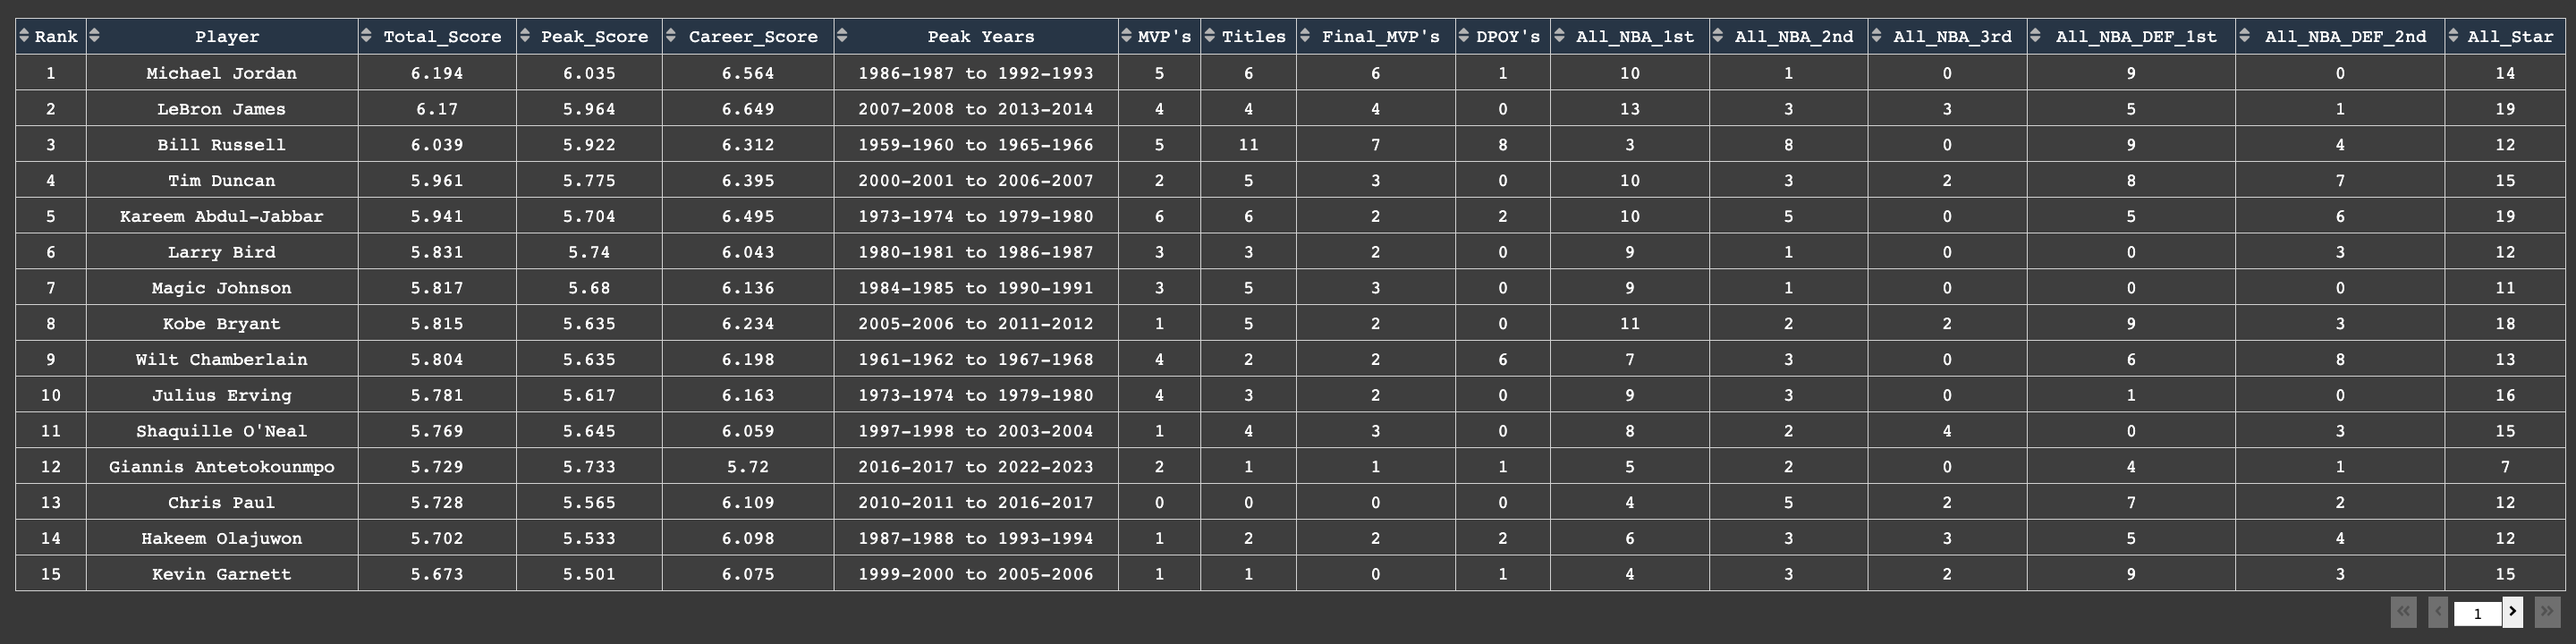
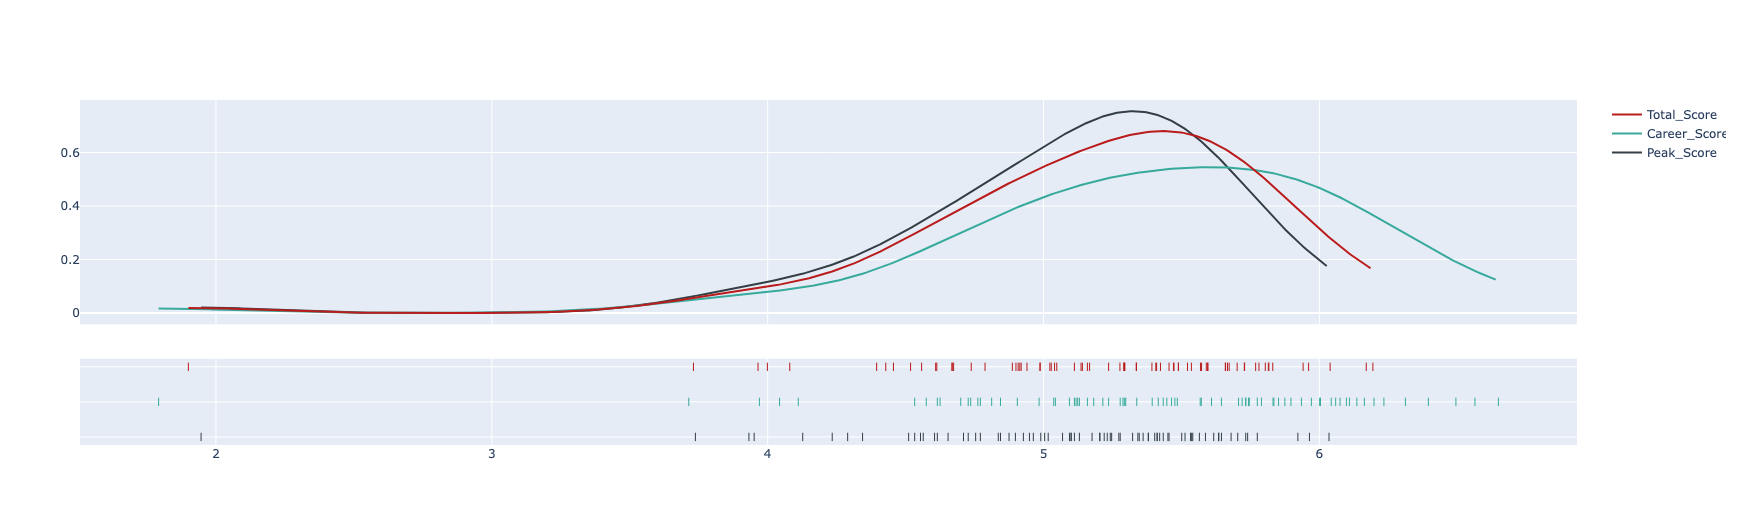





In [ ]:
# @title
!pip install dash

In [ ]:
# @title
from dash import Dash, dash_table, Input, Output, callback
import pandas as pd
import plotly.io as pio
pio.renderers.default = "colab"


df = Top_Players

app = Dash(__name__)

PAGE_SIZE = 15

app.layout = dash_table.DataTable(
    id='table-paging-and-sorting',
    page_current=0,
    page_size=PAGE_SIZE,
    page_action='custom',
    sort_action='custom',
    sort_mode='single',
    sort_by=[],

    style_header={
        'backgroundColor': 'rgb(35, 54, 71)',
        'color': 'white',
        'textAlign': 'center',
        "height":"30px",
        'font_size': '15px',
    },
    style_data={
        'backgroundColor': 'rgb(62, 62, 62)',
        'color': 'white',
        'textAlign': 'center',
        "height":"30px",
        'font_size': '15px',
    },
)


@callback(
    Output('table-paging-and-sorting', 'data'),
    Input('table-paging-and-sorting', "page_current"),
    Input('table-paging-and-sorting', "page_size"),
    Input('table-paging-and-sorting', 'sort_by'))
def update_table(page_current, page_size, sort_by):
    if len(sort_by):
        dff = df.sort_values(
            sort_by[0]['column_id'],
            ascending=sort_by[0]['direction'] == 'asc',
            inplace=False
        )
    else:
        # No sort is applied
        dff = df

    return dff.iloc[
        page_current*page_size:(page_current+ 1)*page_size
    ].to_dict('records')


if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

<h2> Distribution of scores </h2>

In [ ]:
# @title
import plotly.figure_factory as ff

hist_data = [Top_Players["Peak_Score"].tolist(),Top_Players["Career_Score"].tolist(),Top_Players["Total_Score"].tolist()]
group_labels = ['Peak_Score', 'Career_Score','Total_Score']
colors = ['#333F44', '#37AA9C','#ba1c1c']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
fig.show()


# Conclusion

<h2> In conclusion, this project was an enjoyable exploration of NBA player rankings, and the results yielded interesting insights. The findings shed light on some compelling aspects of player evaluation and historical comparisons. Notably, the top ten players emerged as follows: 1st place was claimed by the legendary Michael Jordan, followed closely by LeBron James in 2nd position. The 3rd spot was occupied by Tim Duncan, showcasing his remarkable impact on the game throughout his career. Wilt Chamberlain, an iconic and dominating figure in NBA history, secured the 9th place, while Dr. J, Julius Erving, rounded up the top ten.
<br></br>
Interestingly, the ranking system brought to the forefront some surprising risers, who significantly enhanced their positions in the overall standings. Giannis Antetokounmpo, known for his exceptional defensive prowess, climbed to an unexpected high rank, solidifying his position as a dominant force in modern basketball. Chris Paul, “The Point God”, also enjoyed an impressive rise in the rankings, underlining his exceptional playmaking skills and leadership on the court. Additionally, Kevin Garnett's defensive brilliance propelled him to a surprisingly elevated placement, further validating his impact as one of the game's greatest defenders.
<br></br>
Conversely, certain players experienced unexpected falls in their rankings, considering their esteemed status in basketball lore. Steph Curry, renowned for his incredible shooting ability and revolutionary impact on the game, faced an unforeseen dip in the rankings. Isaiah Thomas, known for his scoring prowess despite being undersized, and Moses Malone, a dominant force during his era, also experienced unexpected declines. These dclines can be attributed to lack of defensive abillity and accolades which were heavily weighted in the system.
<br></br>
Like any statistical model, this ranking system has inherent limitations that warrant consideration. While it undoubtedly offers valuable insights into player performance, it may not fully encapsulate the entirety of a player's contributions to their team or adequately account for the nuances of different basketball eras. Caution is advised when evaluating rankings for older players, as these are influenced by estimated BPM (Box Plus-Minus), which may not precisely represent their true impact on the game.
Although BPM was chosen for its accessibility and ease of interpretation, it may not be the most optimal metric for comprehensive player comparison. Fine-tuning the system by assigning different weights to titles won in the 60s, peak performance levels, and overall career achievements could potentially reshape the rankings and are up for debate.
<br></br>
Inherent complexities arise when attempting to quantify intangible elements such as teamwork, leadership, and other immeasurable attributes, which can significantly shape a player's impact. Consequently, these factors can lead to fluctuations in rankings based on varying evaluation criteria.
<br></br>
Despite these limitations, this project provided a fascinating and fun approach to evaluating NBA players and their contributions to the sport's history. It serves as a valuable tool for sparking discussions and forming arguments in the ongoing debate about the NBA's Greatest of All Time. As the game continues to evolve, and new stars emerge, this ranking system offers a unique lens through which to appreciate the talents and achievements of basketball's finest. </h2>